In [2]:
import pandas as pd
import sys

In [3]:
temp=pd.read_csv("experiment_report_2023_6_8_16h_34m.tsv", delimiter="\t")

In [ ]:
filename=sys.argv[1]

In [3]:
narrow_peak_raw=pd.read_csv("wt_r1_peaks.narrowPeak", sep='\t', lineterminator='\n',header=None)
narrow_peak_raw.columns = ['chrom','start_pos','end_pos','id','score','strand','signalValue','pvalue','qvalue','peak']

In [196]:
narrow_peak_xls=pd.read_csv("wt_r1_peaks.xls", sep='\t',lineterminator='\n',skiprows=range(0,29))
narrow_peak_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   chr              8269 non-null   object 
 1   start            8269 non-null   int64  
 2   end              8269 non-null   int64  
 3   length           8269 non-null   int64  
 4   abs_summit       8269 non-null   int64  
 5   pileup           8269 non-null   int64  
 6   -log10(pvalue)   8269 non-null   float64
 7   fold_enrichment  8269 non-null   float64
 8   -log10(qvalue)   8269 non-null   float64
 9   name             8269 non-null   object 
dtypes: float64(3), int64(5), object(2)
memory usage: 646.1+ KB


In [197]:
narrow_peak_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chrom        8269 non-null   object 
 1   start_pos    8269 non-null   int64  
 2   end_pos      8269 non-null   int64  
 3   id           8269 non-null   object 
 4   score        8269 non-null   int64  
 5   strand       8269 non-null   object 
 6   signalValue  8269 non-null   float64
 7   pvalue       8269 non-null   float64
 8   qvalue       8269 non-null   float64
 9   peak         8269 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 646.1+ KB


In [322]:
temp=narrow_peak_raw[ (narrow_peak_raw['end_pos'] - narrow_peak_raw['start_pos']) > 150]
temp=temp[temp['score'] > 50]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 1 to 8268
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chrom        5383 non-null   object 
 1   start_pos    5383 non-null   int64  
 2   end_pos      5383 non-null   int64  
 3   id           5383 non-null   object 
 4   score        5383 non-null   int64  
 5   strand       5383 non-null   object 
 6   signalValue  5383 non-null   float64
 7   pvalue       5383 non-null   float64
 8   qvalue       5383 non-null   float64
 9   peak         5383 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 462.6+ KB


In [323]:
peak_final=pd.DataFrame(columns=['chro','start_pos','end_pos'])
peak_final['chro']=temp['chrom']
peak_final['start_pos']= (temp['start_pos'] + temp['peak']) -74
peak_final['end_pos']=((temp['start_pos'] + temp['peak']) -74)+150
peak_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 1 to 8268
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   chro       5383 non-null   object
 1   start_pos  5383 non-null   int64 
 2   end_pos    5383 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 168.2+ KB


In [312]:
peak_final.to_csv('/home/orky/Documents/Genomic_pipeline/peak_call_dnn/peaks1.bed', header=None, index=None, sep='\t',mode='a')

In [324]:
(peak_final['end_pos'] - peak_final['start_pos']).max()

150

In [250]:
peak_inter['size'].mean()
narrow_peak_raw['score'].min()

13

In [157]:
x=narrow_peak.index
y_score=narrow_peak['score']
y_pileup=narrow_peak_xls['pileup']

y_score=(y_score - y_score.min()) / (y_score.max() - y_score.min())
y_pileup=(y_pileup - y_pileup.min()) / (y_pileup.max() - y_score.min())

y_absolute=abs(y_score - y_pileup)

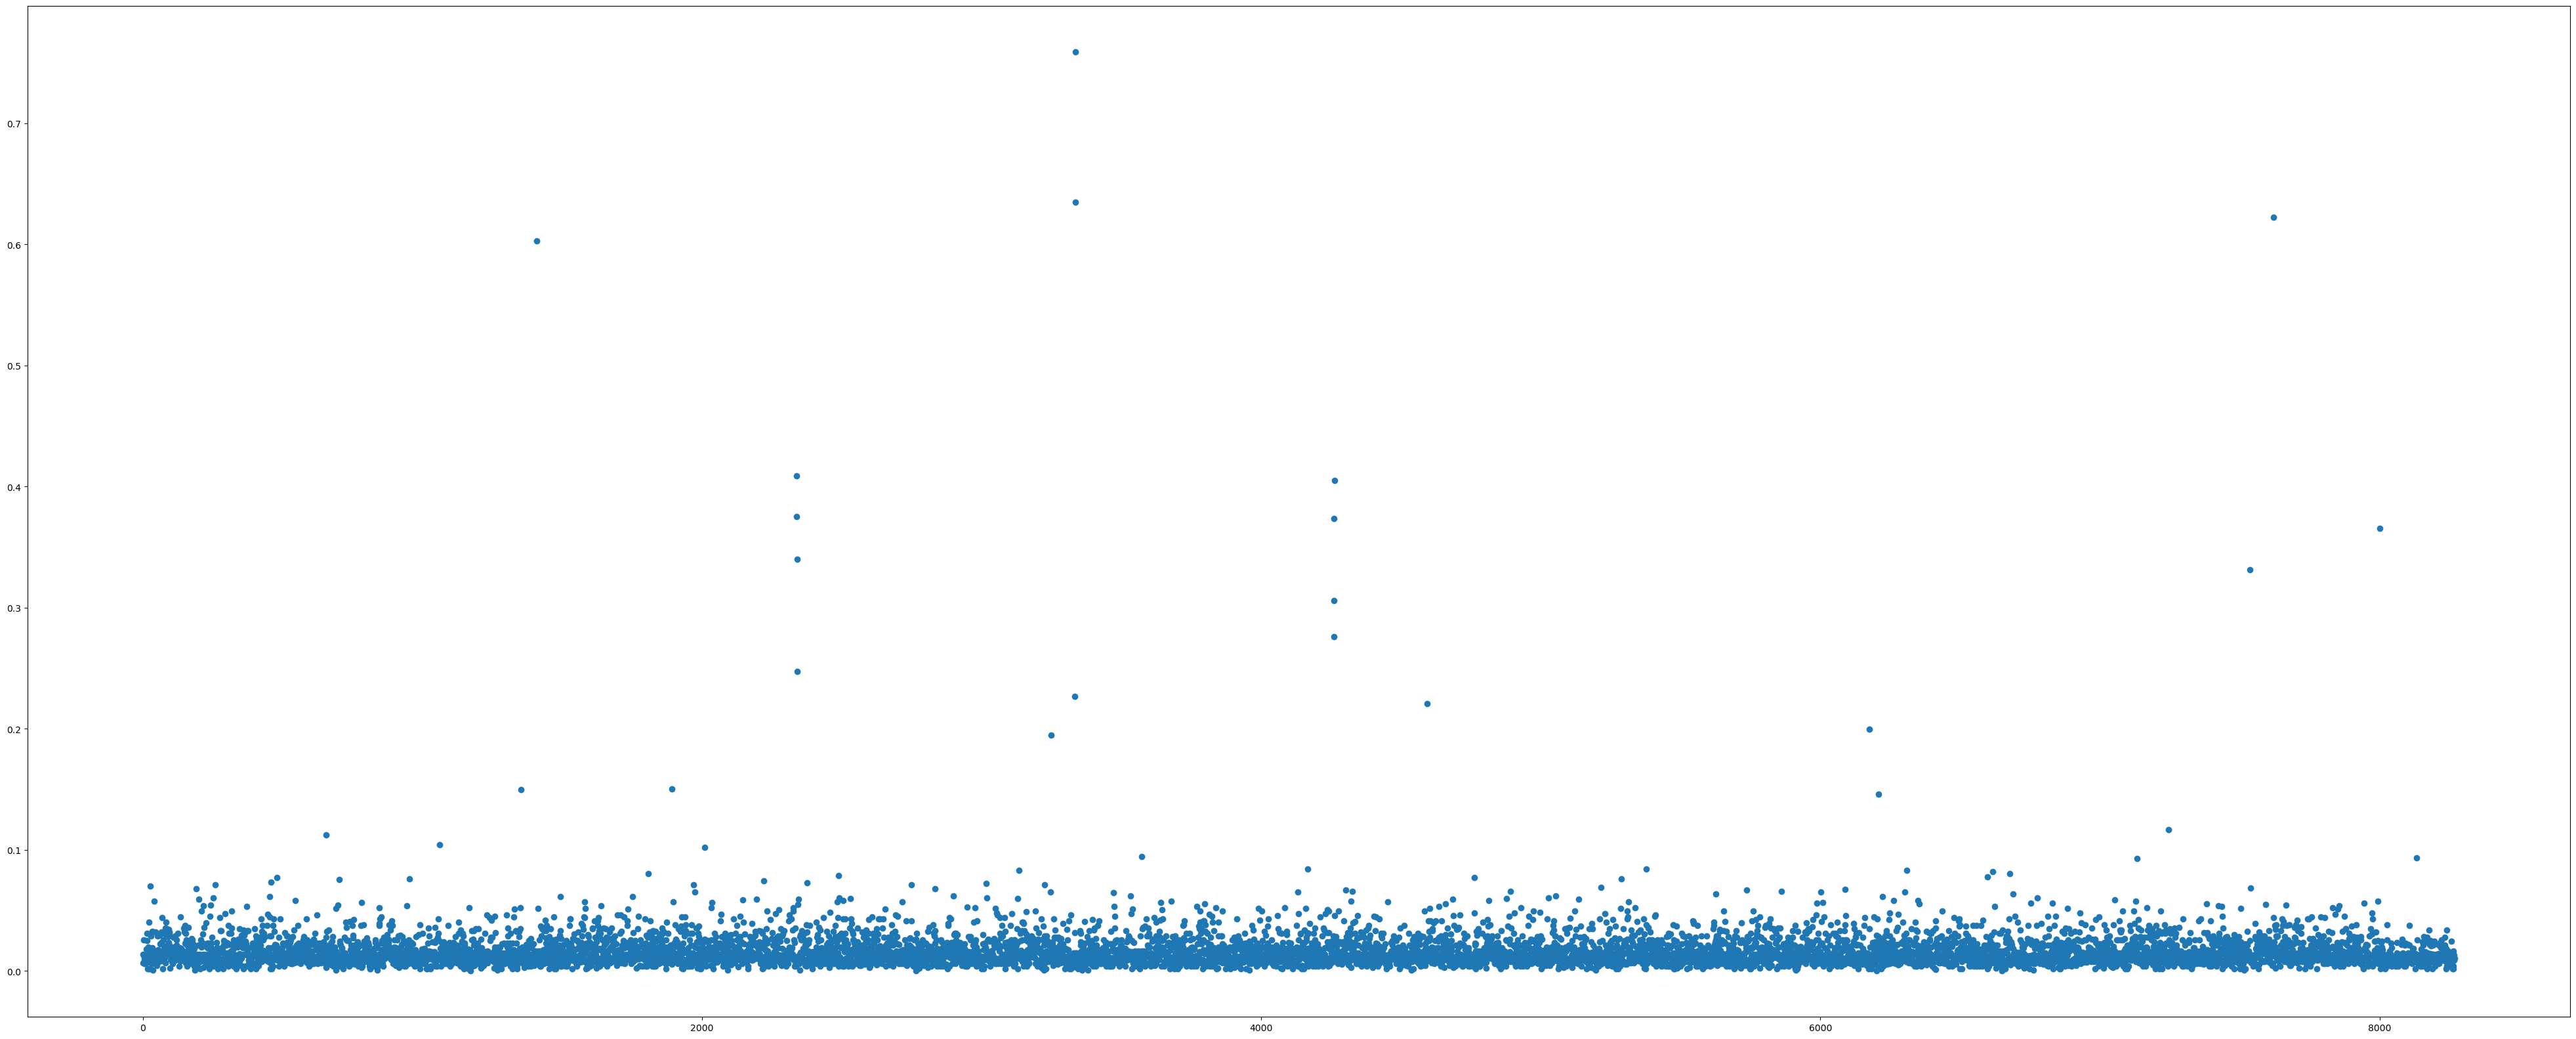

In [166]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(50, 20))
ax = fig.add_subplot(111)
#f, ax = plt.subplots(1)
#ax.scatter(x, y_pileup,alpha=0.5)
#ax.scatter(x, y_score,alpha=0.5)
ax.scatter(x,y_absolute)

In [172]:
import statistics
import numpy as np

#std_num=statistics.stdev(y_absolute)
pearson_coff=np.corrcoef(y_score,y_pileup)
pearson_coff

array([[1.        , 0.88508877],
       [0.88508877, 1.        ]])

In [316]:
from shutil import which

In [319]:
which('lsl') is not None

False

In [377]:
start=0
end=0
f=open('outfile.txt','w')
f.close()
chro_num=peak_final.iloc[0,0]

for index in range(1,len(peak_final)):
    chro_next=peak_final.iloc[index,0]
    if chro_num==chro_next:
        continue
    else:
        end=index
        with open('outfile.txt', 'a') as f:
            f.write(chro_num+" , "+str(start)+" , "+ str(end-1)+"\n")
        start=index
        chro_num=peak_final.iloc[index,0]

In [3]:
start=0
end=0
f=open('outfile.txt','w')
f.close()
chro_num=narrow_peak_raw.iloc[0,0]

for index in range(1,len(narrow_peak_raw)):
    chro_next=narrow_peak_raw.iloc[index,0]
    if index==(len(narrow_peak_raw)-1):
        with open('outfile.txt', 'a') as f:
            f.write(chro_num+" , "+str(start)+" , "+ str(len(narrow_peak_raw)-1)+"\n")
    elif chro_num==chro_next:
        continue
    else:
        print(chro_num,chro_next)
        end=index
        with open('outfile.txt', 'a') as f:
            f.write(chro_num+" , "+str(start)+" , "+ str(end-1)+"\n")
        start=index
        chro_num=narrow_peak_raw.iloc[index,0]

chr1 chr10
chr10 chr11
chr11 chr12
chr12 chr13
chr13 chr14
chr14 chr15
chr15 chr16
chr16 chr17
chr17 chr18
chr18 chr19
chr19 chr2
chr2 chr3
chr3 chr4
chr4 chr5
chr5 chr6
chr6 chr7
chr7 chr8
chr8 chr9
chr9 chrUn_GL456359
chrUn_GL456359 chrUn_GL456392
chrUn_GL456392 chrX
chrX chrX_GL456233_random
chrX_GL456233_random chrY


In [33]:
len(narrow_peak_raw)

8269

In [4]:
chrom_index=pd.read_csv('outfile.txt', lineterminator='\n',header=None)
chrom_index.columns=['chro','start_pos','end_pos']
negative_index=pd.DataFrame(columns=['chro','start_pos','end_pos'])
end=[]
for i in range(0,len(chrom_index)):
    end.append(chrom_index.iloc[i,2])
window_size=150
start=0
temp=[]
for i in end:
    for j in range(start,i):
        t=j+1
        if t == end[-1]:
            gap=narrow_peak_raw.iloc[(j+1),1] - narrow_peak_raw.iloc[j,2]
            if gap > window_size*2:
                mid=gap//2
                neg_start=narrow_peak_raw.iloc[j,2] + (mid - window_size//2)
                neg_end=narrow_peak_raw.iloc[j,2] + (mid + window_size//2)    
                negative_index.loc[j]=[narrow_peak_raw.iloc[j,0],neg_start,neg_end]
            #temp.append(narrow_peak_raw.iloc[j,2])
            #temp.append(narrow_peak_raw.iloc[(j+1),1])
            break
        elif t == i:
            gap=narrow_peak_raw.iloc[(j+1),1] - narrow_peak_raw.iloc[j,2]
            if gap > window_size*2:
                mid=gap//2
                neg_start=narrow_peak_raw.iloc[j,2] + (mid - window_size//2)
                neg_end=narrow_peak_raw.iloc[j,2] + (mid + window_size//2) 
                negative_index.loc[j]=[narrow_peak_raw.iloc[j,0],neg_start,neg_end]
            #temp.append(narrow_peak_raw.iloc[j,2])
            #temp.append(narrow_peak_raw.iloc[(j+1),1]) 
            break
        gap=narrow_peak_raw.iloc[(j+1),1] - narrow_peak_raw.iloc[j,2]
        if gap > window_size*2:
            mid=gap//2
            neg_start=narrow_peak_raw.iloc[j,2] + (mid - window_size//2)
            neg_end=narrow_peak_raw.iloc[j,2] + (mid + window_size//2) 
            negative_index.loc[j]=[narrow_peak_raw.iloc[j,0],neg_start,neg_end]
        #temp.append(narrow_peak_raw.iloc[j,2])
        #temp.append(narrow_peak_raw.iloc[(j+1),1])                
    start=i+1



In [5]:
negative_index.to_csv('/home/orky/Documents/Genomic_pipeline/peak_call_dnn/neg_peaks.bed', header=None, index=None, sep='\t',mode='a')

,chro,start_pos,end_pos
0,chr1,0,593
